In [3]:
import os
import sys
import shutil
import subprocess
from pathlib import Path
from sklearn.model_selection import train_test_split

def download_and_organize_dataset(data_root: Path, kaggle_username: str = None, kaggle_key: str = None):
    """Télécharge et organise le dataset PlantVillage si absent."""
    if data_root.exists() and (data_root / 'train').exists():
        print(f"✅ Dataset déjà présent à {data_root}. Téléchargement sauté.")
        return

    print("📥 Téléchargement et organisation du dataset PlantVillage...")

    # Définir les credentials Kaggle via env si fournis
    if kaggle_username and kaggle_key:
        os.environ['KAGGLE_USERNAME'] = kaggle_username
        os.environ['KAGGLE_KEY'] = kaggle_key
    else:
        print("❌ Credentials Kaggle manquants. Configurez ~/.kaggle/kaggle.json "
              "ou fournissez --kaggle_username et --kaggle_key.")
        sys.exit(1)

    # Installer kaggle si nécessaire
    try:
        from kaggle.api.kaggle_api_extended import KaggleApi
    except ImportError:
        subprocess.run(["pip", "install", "kaggle"], check=True)
        from kaggle.api.kaggle_api_extended import KaggleApi

    api = KaggleApi()
    api.authenticate()

    # Télécharger le dataset
    download_path = Path('./')  # à adapter (Colab = '/content')
    dataset_name = 'abdallahalidev/plantvillage-dataset'
    try:
        api.dataset_download_files(dataset_name, path=download_path, unzip=True)
    except Exception as e:
        print(f"Erreur lors du téléchargement du dataset {dataset_name}: {e}")
        sys.exit(1)

    # Le dossier unzippé est 'plantvillage dataset' (avec espace)
    source_dir = download_path / 'plantvillage dataset' / 'color'  # version color

    if not source_dir.exists():
        raise FileNotFoundError(f"Dossier source introuvable après téléchargement: {source_dir}")

    # Organiser en train/val/test
    organize_dataset(str(source_dir), str(data_root))
    print(f"✅ Dataset téléchargé et organisé à {data_root}.")


def organize_dataset(source_dir: str, dest_dir: str, train_ratio: float = 0.8, val_ratio: float = 0.1):
    """Organise les images en splits train/val/test."""
    source_dir = Path(source_dir)
    dest_dir = Path(dest_dir)
    dest_dir.mkdir(parents=True, exist_ok=True)

    classes = [d.name for d in source_dir.iterdir() if d.is_dir()]

    for split in ['train', 'val', 'test']:
        for cls in classes:
            (dest_dir / split / cls).mkdir(parents=True, exist_ok=True)

    for cls in classes:
        class_dir = source_dir / cls
        images = list(class_dir.glob('*.jpg')) + list(class_dir.glob('*.JPG'))
        if not images:
            print(f"⚠️ Aucune image trouvée pour la classe {cls}, sautée.")
            continue

        train_imgs, temp_imgs = train_test_split(images, test_size=1 - train_ratio, random_state=42)
        test_ratio = 1 - train_ratio - val_ratio
        val_imgs, test_imgs = train_test_split(
            temp_imgs, test_size=test_ratio / (val_ratio + test_ratio), random_state=42
        )

        for img in train_imgs:
            shutil.copy(img, dest_dir / 'train' / cls / img.name)
        for img in val_imgs:
            shutil.copy(img, dest_dir / 'val' / cls / img.name)
        for img in test_imgs:
            shutil.copy(img, dest_dir / 'test' / cls / img.name)


In [4]:
download_and_organize_dataset(Path("./PlantVillage"), kaggle_username="TON_USER", kaggle_key="TA_CLE")

📥 Téléchargement et organisation du dataset PlantVillage...
Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
✅ Dataset téléchargé et organisé à PlantVillage.


Utilisation du GPU : Tesla T4

=== VGG19 ===


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


100%|██████████| 548M/548M [00:03<00:00, 144MB/s]


Epoch 1/5
--------------------


/tmp/ipython-input-3668162376.py:74: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if torch.cuda.is_available() else None  # Mixed precision pour GPU seulement
/tmp/ipython-input-3668162376.py:93: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Mixed precision pour GPU


train Loss: 1.3182 Acc: 0.6457
val Loss: 0.8474 Acc: 0.7568

Epoch 2/5
--------------------
train Loss: 0.8797 Acc: 0.7426
val Loss: 0.6751 Acc: 0.7955

Epoch 3/5
--------------------
train Loss: 0.7861 Acc: 0.7629
val Loss: 0.6089 Acc: 0.8101

Epoch 4/5
--------------------
train Loss: 0.7388 Acc: 0.7745
val Loss: 0.5810 Acc: 0.8154

Epoch 5/5
--------------------
train Loss: 0.7117 Acc: 0.7811
val Loss: 0.5379 Acc: 0.8368

Entraînement terminé en 13m 36s
Meilleure val Acc: 0.8368


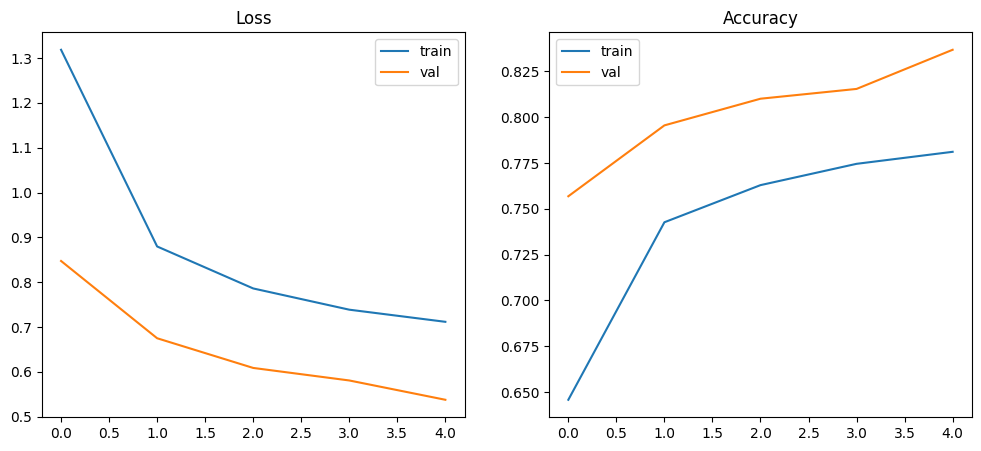


=== RESNET34 ===
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 150MB/s]


Epoch 1/5
--------------------
train Loss: 1.1214 Acc: 0.7564
val Loss: 0.5808 Acc: 0.8686

Epoch 2/5
--------------------
train Loss: 0.4829 Acc: 0.8914
val Loss: 0.4079 Acc: 0.9011

Epoch 3/5
--------------------
train Loss: 0.3745 Acc: 0.9098
val Loss: 0.3424 Acc: 0.9164

Epoch 4/5
--------------------
train Loss: 0.3266 Acc: 0.9182
val Loss: 0.3010 Acc: 0.9211

Epoch 5/5
--------------------
train Loss: 0.2951 Acc: 0.9218
val Loss: 0.2826 Acc: 0.9265

Entraînement terminé en 11m 48s
Meilleure val Acc: 0.9265


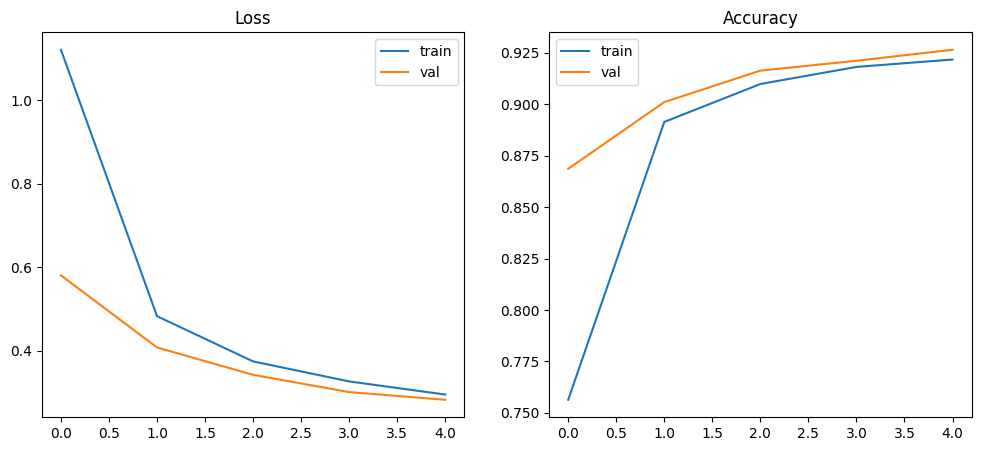


=== DENSENET121 ===
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 140MB/s]


Epoch 1/5
--------------------
train Loss: 1.0377 Acc: 0.7899
val Loss: 0.4875 Acc: 0.9088

Epoch 2/5
--------------------
train Loss: 0.4052 Acc: 0.9167
val Loss: 0.3325 Acc: 0.9289

Epoch 3/5
--------------------
train Loss: 0.3036 Acc: 0.9328
val Loss: 0.2647 Acc: 0.9436

Epoch 4/5
--------------------
train Loss: 0.2552 Acc: 0.9421
val Loss: 0.2226 Acc: 0.9499

Epoch 5/5
--------------------
train Loss: 0.2257 Acc: 0.9466
val Loss: 0.2029 Acc: 0.9549

Entraînement terminé en 13m 34s
Meilleure val Acc: 0.9549


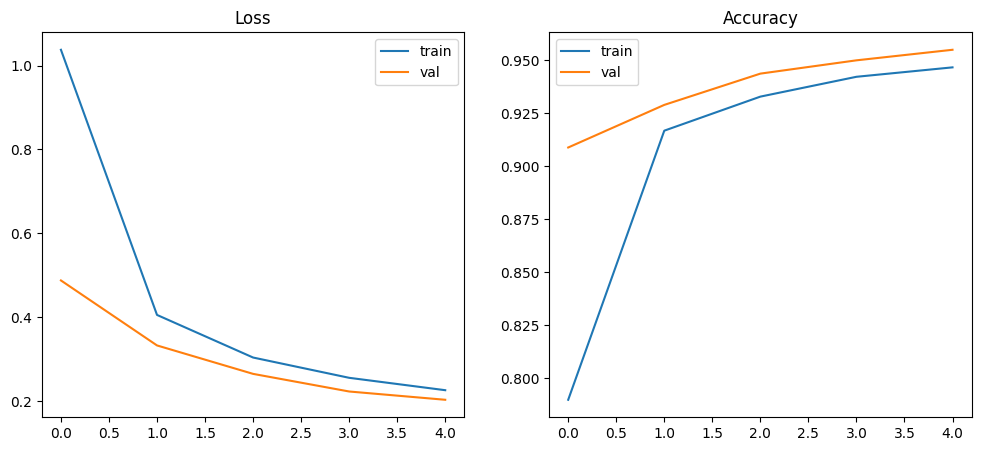

In [3]:
# ===============================
# Exercice 1 - Transfer Learning (GPU Preferred, CPU Fallback)
# ===============================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time, copy, os
from torch.cuda.amp import GradScaler, autocast  # For mixed precision training

# ===============================
# 1. Vérification GPU ou CPU
# ===============================
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(f"Utilisation du GPU : {torch.cuda.get_device_name(0)}")
else:
    print("Aucun GPU détecté, utilisation du CPU (entraînement plus lent).")

data_dir = "/content/PlantVillage"

# Normalisation selon ImageNet (car poids pré-entraînés)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val', 'test']}

# Optimisation DataLoader (ajusté pour CPU si nécessaire)
num_workers = 4 if torch.cuda.is_available() else 0  # Réduit à 0 pour CPU
pin_memory = torch.cuda.is_available()  # Active pin_memory seulement pour GPU
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=32,
                                              shuffle=True,
                                              num_workers=num_workers,
                                              pin_memory=pin_memory)
              for x in ['train', 'val', 'test']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
class_names = image_datasets['train'].classes

# ===============================
# 2. Fonction d’entraînement avec Mixed Precision (GPU) ou standard (CPU)
# ===============================
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_loss_hist, val_loss_hist = [], []
    train_acc_hist, val_acc_hist = [], []
    scaler = GradScaler() if torch.cuda.is_available() else None  # Mixed precision pour GPU seulement

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 20)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss, running_corrects = 0.0, 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device, non_blocking=pin_memory), labels.to(device, non_blocking=pin_memory)
                optimizer.zero_grad()

                if torch.cuda.is_available():
                    with autocast():  # Mixed precision pour GPU
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)
                else:
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                if phase == 'train':
                    if torch.cuda.is_available():
                        scaler.scale(loss).backward()
                        scaler.step(optimizer)
                        scaler.update()
                    else:
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == 'train':
                train_loss_hist.append(epoch_loss)
                train_acc_hist.append(epoch_acc.item())
            else:
                val_loss_hist.append(epoch_loss)
                val_acc_hist.append(epoch_acc.item())

            # Meilleur modèle
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f"Entraînement terminé en {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s")
    print(f"Meilleure val Acc: {best_acc:.4f}")

    # Charger meilleur modèle
    model.load_state_dict(best_model_wts)

    # Courbes
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_hist, label="train")
    plt.plot(val_loss_hist, label="val")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc_hist, label="train")
    plt.plot(val_acc_hist, label="val")
    plt.title("Accuracy")
    plt.legend()
    plt.show()

    return model

# ===============================
# 3. Fonctions pour définir modèles
# ===============================
def initialize_model(model_name, num_classes, feature_extract=True):
    if model_name == "vgg19":
        model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
        for param in model.parameters():
            param.requires_grad = not feature_extract
        model.classifier[6] = nn.Linear(4096, num_classes)

    elif model_name == "resnet34":
        model = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        for param in model.parameters():
            param.requires_grad = not feature_extract
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)

    elif model_name == "densenet121":
        model = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
        for param in model.parameters():
            param.requires_grad = not feature_extract
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)

    return model.to(device)

# ===============================
# 4. Entraînement des 3 modèles
# ===============================
num_classes = len(class_names)

for model_name in ["vgg19", "resnet34", "densenet121"]:
    print(f"\n=== {model_name.upper()} ===")
    model_ft = initialize_model(model_name, num_classes, feature_extract=True)
    criterion = nn.CrossEntropyLoss()
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    best_model = train_model(model_ft, criterion, optimizer_ft,
                             exp_lr_scheduler, num_epochs=5)

    # Sauvegarde
    torch.save(best_model.state_dict(), f"{model_name}_plantvillage.pth")

**Exercice 2:**

Utilisation du GPU : Tesla T4
Nombre de classes dans PlantVillage : 38

=== VGG19 ===
Initialisation de vgg19 avec poids pré-entraînés sur ImageNet
Epoch 1/5
--------------------


/tmp/ipython-input-873721580.py:78: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if torch.cuda.is_available() else None
/tmp/ipython-input-873721580.py:97: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


train Loss: 1.3224 Acc: 0.6418
val Loss: 0.8520 Acc: 0.7517

Epoch 2/5
--------------------
train Loss: 0.8781 Acc: 0.7432
val Loss: 0.6837 Acc: 0.7961

Epoch 3/5
--------------------
train Loss: 0.7868 Acc: 0.7616
val Loss: 0.5850 Acc: 0.8213

Epoch 4/5
--------------------
train Loss: 0.7398 Acc: 0.7745
val Loss: 0.5328 Acc: 0.8366

Epoch 5/5
--------------------
train Loss: 0.7099 Acc: 0.7824
val Loss: 0.5276 Acc: 0.8417

Entraînement terminé en 13m 31s
Meilleure val Acc: 0.8417


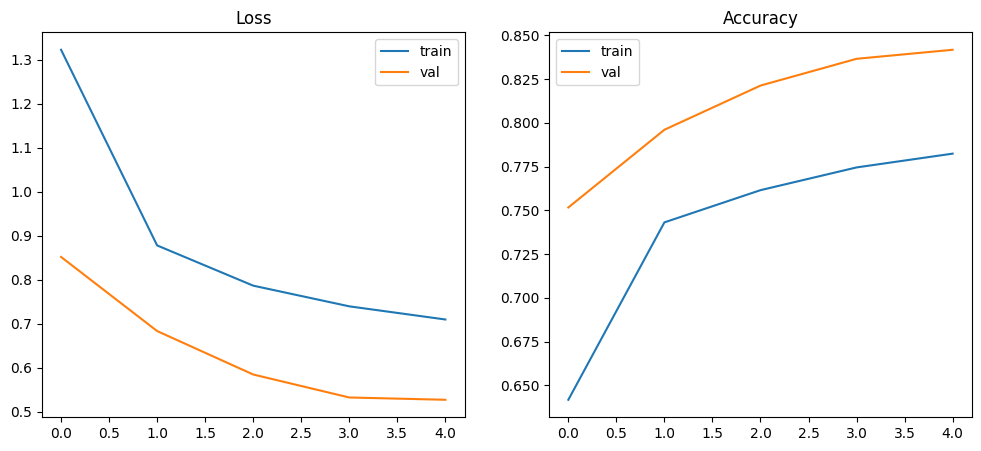


=== RESNET34 ===
Initialisation de resnet34 avec poids pré-entraînés sur ImageNet
Epoch 1/5
--------------------
train Loss: 1.1288 Acc: 0.7571
val Loss: 0.5696 Acc: 0.8745

Epoch 2/5
--------------------
train Loss: 0.4824 Acc: 0.8934
val Loss: 0.4054 Acc: 0.9066

Epoch 3/5
--------------------
train Loss: 0.3782 Acc: 0.9090
val Loss: 0.3402 Acc: 0.9145

Epoch 4/5
--------------------
train Loss: 0.3246 Acc: 0.9180
val Loss: 0.3138 Acc: 0.9180

Epoch 5/5
--------------------
train Loss: 0.2962 Acc: 0.9225
val Loss: 0.2868 Acc: 0.9232

Entraînement terminé en 11m 56s
Meilleure val Acc: 0.9232


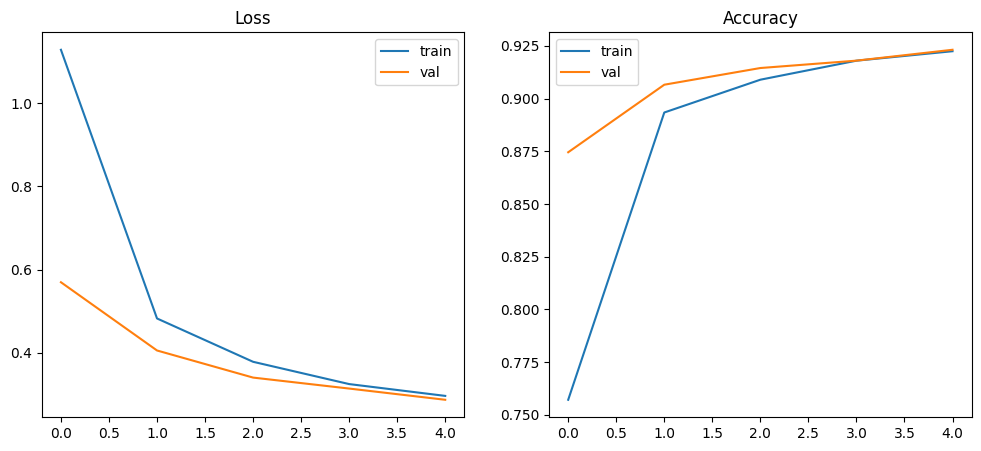


=== DENSENET121 ===
Initialisation de densenet121 avec poids pré-entraînés sur ImageNet
Epoch 1/5
--------------------
train Loss: 1.0394 Acc: 0.7892
val Loss: 0.4873 Acc: 0.9062

Epoch 2/5
--------------------
train Loss: 0.4030 Acc: 0.9183
val Loss: 0.3308 Acc: 0.9324

Epoch 3/5
--------------------
train Loss: 0.3027 Acc: 0.9344
val Loss: 0.2565 Acc: 0.9444

Epoch 4/5
--------------------
train Loss: 0.2552 Acc: 0.9420
val Loss: 0.2183 Acc: 0.9492

Epoch 5/5
--------------------
train Loss: 0.2247 Acc: 0.9480
val Loss: 0.1983 Acc: 0.9558

Entraînement terminé en 13m 37s
Meilleure val Acc: 0.9558


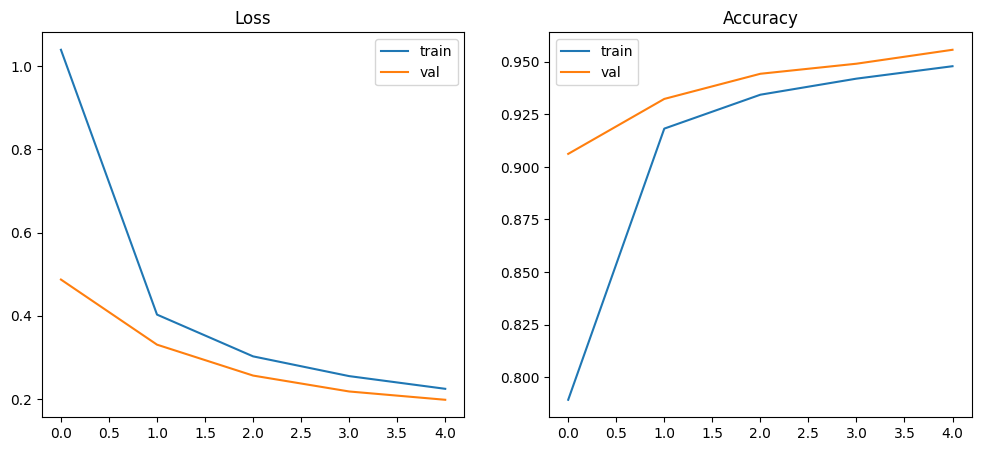

In [8]:
# ===============================
# Exercice 2 - Transfer Learning avec Poids Pré-entraînés (GPU Optimisé)
# ===============================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time, copy, os
from torch.cuda.amp import GradScaler, autocast  # Pour mixed precision training

# ===============================
# 1. Vérification GPU ou CPU
# ===============================
if not torch.cuda.is_available():
    print("Aucun GPU détecté, utilisation du CPU (entraînement plus lent).")
    # Décommentez la ligne suivante pour forcer l'arrêt si GPU non disponible
    # raise RuntimeError("GPU non disponible. Ce code nécessite un GPU.")
else:
    print(f"Utilisation du GPU : {torch.cuda.get_device_name(0)}")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_dir = "/content/PlantVillage"

# Normalisation selon ImageNet (car poids pré-entraînés)
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val', 'test']}

# Optimisation DataLoader (ajusté pour CPU si nécessaire)
num_workers = 4 if torch.cuda.is_available() else 0
pin_memory = torch.cuda.is_available()
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=32,
                                              shuffle=True,
                                              num_workers=num_workers,
                                              pin_memory=pin_memory)
              for x in ['train', 'val', 'test']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
class_names = image_datasets['train'].classes
num_classes = len(class_names)
print(f"Nombre de classes dans PlantVillage : {num_classes}")

# ===============================
# 2. Fonction d’entraînement avec Mixed Precision (GPU) ou standard (CPU)
# ===============================
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_loss_hist, val_loss_hist = [], []
    train_acc_hist, val_acc_hist = [], []
    scaler = GradScaler() if torch.cuda.is_available() else None

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 20)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss, running_corrects = 0.0, 0

            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device, non_blocking=pin_memory), labels.to(device, non_blocking=pin_memory)
                optimizer.zero_grad()

                if torch.cuda.is_available():
                    with autocast():
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)
                else:
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                if phase == 'train':
                    if torch.cuda.is_available():
                        scaler.scale(loss).backward()
                        scaler.step(optimizer)
                        scaler.update()
                    else:
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == 'train':
                train_loss_hist.append(epoch_loss)
                train_acc_hist.append(epoch_acc.item())
            else:
                val_loss_hist.append(epoch_loss)
                val_acc_hist.append(epoch_acc.item())

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f"Entraînement terminé en {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s")
    print(f"Meilleure val Acc: {best_acc:.4f}")

    # Courbes
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_hist, label="train")
    plt.plot(val_loss_hist, label="val")
    plt.title("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_acc_hist, label="train")
    plt.plot(val_acc_hist, label="val")
    plt.title("Accuracy")
    plt.legend()
    plt.show()

    model.load_state_dict(best_model_wts)
    return model

# ===============================
# 3. Fonctions pour définir modèles avec poids pré-entraînés
# ===============================
def initialize_model(model_name, num_classes, feature_extract=True):
    print(f"Initialisation de {model_name} avec poids pré-entraînés sur ImageNet")

    if model_name == "vgg19":
        # Chargement du modèle VGG19 avec poids ImageNet
        model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
        # Geler les poids si feature_extract=True (seule la tête sera entraînée)
        for param in model.parameters():
            param.requires_grad = not feature_extract
        # Remplacement de la tête de classification (ImageNet: 1000 classes -> PlantVillage: num_classes)
        model.classifier[6] = nn.Linear(4096, num_classes)

    elif model_name == "resnet34":
        # Chargement du modèle ResNet34 avec poids ImageNet
        model = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
        for param in model.parameters():
            param.requires_grad = not feature_extract
        # Remplacement de la couche fully connected
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)

    elif model_name == "densenet121":
        # Chargement du modèle DenseNet121 avec poids ImageNet
        model = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
        for param in model.parameters():
            param.requires_grad = not feature_extract
        # Remplacement de la couche classifier
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)

    return model.to(device)

# ===============================
# 4. Entraînement des 3 modèles
# ===============================
for model_name in ["vgg19", "resnet34", "densenet121"]:
    print(f"\n=== {model_name.upper()} ===")
    model_ft = initialize_model(model_name, num_classes, feature_extract=True)
    criterion = nn.CrossEntropyLoss()
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    best_model = train_model(model_ft, criterion, optimizer_ft,
                             exp_lr_scheduler, num_epochs=5)

    torch.save(best_model.state_dict(), f"{model_name}_plantvillage.pth")

**Exercice 3:**

Utilisation du GPU : Tesla T4


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Device: cuda:0 | Classes: 38 | Train size: 43427
EfficientNet-B0 - params to update: 48678

Epoch 1/5 | Model: efficientnet_b0


/tmp/ipython-input-3202191498.py:96: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if torch.cuda.is_available() else None
/tmp/ipython-input-3202191498.py:116: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


train Loss: 0.6143 Acc: 0.8580
val Loss: 0.3004 Acc: 0.9176
--> Nouveau meilleur modèle sauvegardé: best_efficientnet_b0.pth
Test Acc: 0.9099

Epoch 2/5 | Model: efficientnet_b0
train Loss: 0.2649 Acc: 0.9246
val Loss: 0.2100 Acc: 0.9383
--> Nouveau meilleur modèle sauvegardé: best_efficientnet_b0.pth
Test Acc: 0.9310

Epoch 3/5 | Model: efficientnet_b0
train Loss: 0.2216 Acc: 0.9332
val Loss: 0.1807 Acc: 0.9434
--> Nouveau meilleur modèle sauvegardé: best_efficientnet_b0.pth
Test Acc: 0.9358

Epoch 4/5 | Model: efficientnet_b0
train Loss: 0.2059 Acc: 0.9351
val Loss: 0.1517 Acc: 0.9523
--> Nouveau meilleur modèle sauvegardé: best_efficientnet_b0.pth
Test Acc: 0.9468

Epoch 5/5 | Model: efficientnet_b0
train Loss: 0.1962 Acc: 0.9370
val Loss: 0.1459 Acc: 0.9512
Test Acc: 0.9471

Entraînement terminé en 21m 39s. Best val Acc: 0.9523


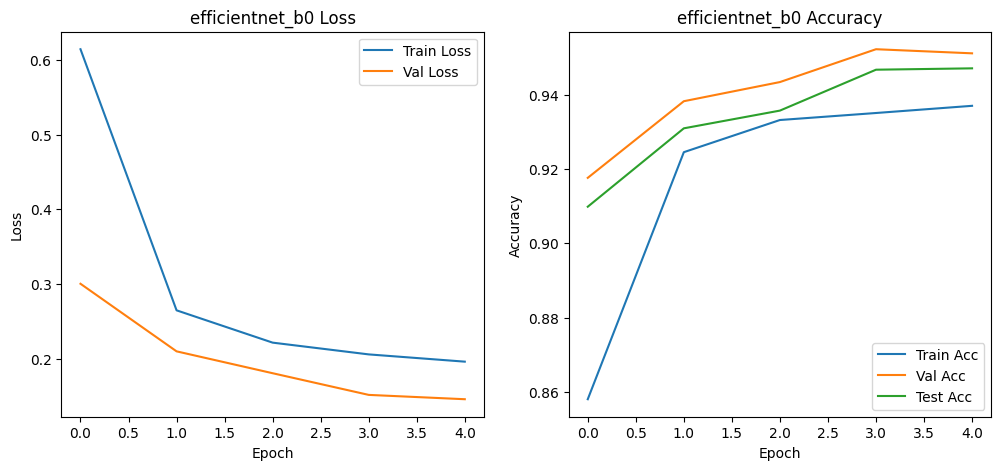

ViT-B/16 - params to update: 29222

Epoch 1/5 | Model: vit_b_16
train Loss: 0.6975 Acc: 0.8600
val Loss: 0.2745 Acc: 0.9473
--> Nouveau meilleur modèle sauvegardé: best_vit_b_16.pth
Test Acc: 0.9464

Epoch 2/5 | Model: vit_b_16
train Loss: 0.1894 Acc: 0.9614
val Loss: 0.1642 Acc: 0.9646
--> Nouveau meilleur modèle sauvegardé: best_vit_b_16.pth
Test Acc: 0.9690

Epoch 3/5 | Model: vit_b_16
train Loss: 0.1236 Acc: 0.9732
val Loss: 0.1237 Acc: 0.9711
--> Nouveau meilleur modèle sauvegardé: best_vit_b_16.pth
Test Acc: 0.9747

Epoch 4/5 | Model: vit_b_16
train Loss: 0.0946 Acc: 0.9784
val Loss: 0.1043 Acc: 0.9755
--> Nouveau meilleur modèle sauvegardé: best_vit_b_16.pth
Test Acc: 0.9782

Epoch 5/5 | Model: vit_b_16
train Loss: 0.0766 Acc: 0.9823
val Loss: 0.0890 Acc: 0.9770
--> Nouveau meilleur modèle sauvegardé: best_vit_b_16.pth
Test Acc: 0.9800

Entraînement terminé en 25m 58s. Best val Acc: 0.9770


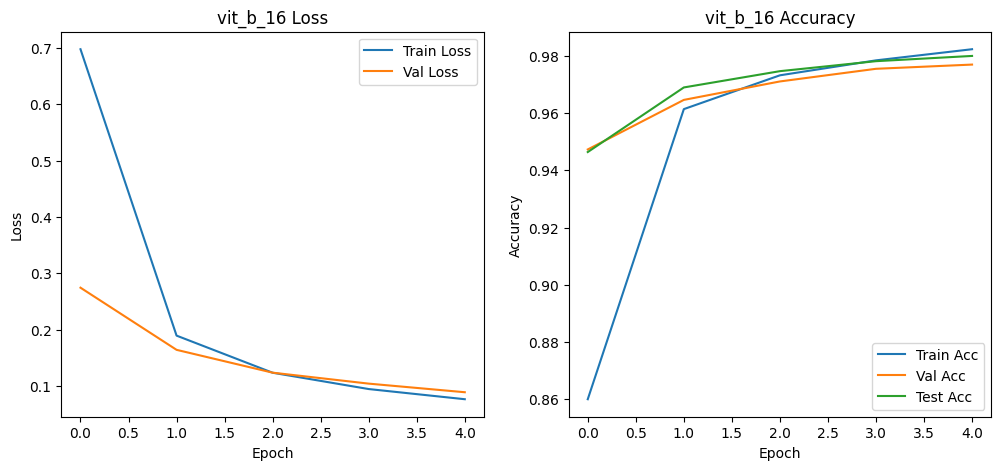

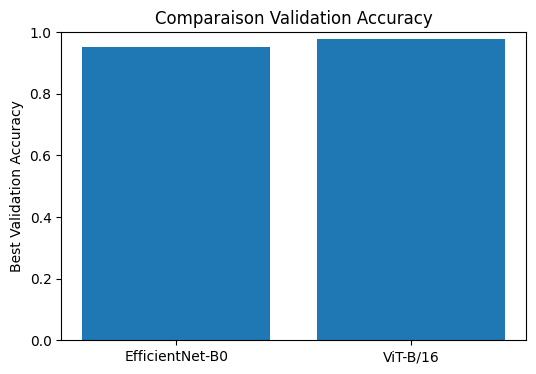

Terminé. Modèles sauvegardés dans: /content/outputs_models


In [1]:
# ===============================
# Exercice 3 - Transfer Learning avec EfficientNet et ViT (GPU Optimisé)
# ===============================
import os
import time
import copy
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
from torch.cuda.amp import GradScaler, autocast  # Pour mixed precision
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# CONFIG
# -----------------------------
DATA_DIR = "/content/PlantVillage"  # Chemin vers le dataset PlantVillage
BATCH_SIZE = 32
IMG_SIZE = 224
NUM_EPOCHS = 5
NUM_WORKERS = 4
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
MODEL_OUTPUT_DIR = Path("./outputs_models")
MODEL_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
FEATURE_EXTRACT = True  # Geler le backbone, entraîner seulement la tête
LR_EFFNET = 1e-3  # Learning rate pour EfficientNet
LR_VIT = 3e-4     # Learning rate plus petit pour ViT
WEIGHT_DECAY = 1e-4

# Vérification GPU
if not torch.cuda.is_available():
    print("Aucun GPU détecté, utilisation du CPU (entraînement plus lent).")
    # Décommentez pour forcer l'arrêt si GPU non disponible
    # raise RuntimeError("GPU non disponible. Ce code nécessite un GPU.")
else:
    print(f"Utilisation du GPU : {torch.cuda.get_device_name(0)}")

# -----------------------------
# Transforms & Dataloaders
# -----------------------------
data_transforms = {
    "train": transforms.Compose([
        transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(0.2, 0.2, 0.2),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    "val": transforms.Compose([
        transforms.Resize(int(IMG_SIZE * 1.14)),
        transforms.CenterCrop(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    "test": transforms.Compose([
        transforms.Resize(int(IMG_SIZE * 1.14)),
        transforms.CenterCrop(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join(DATA_DIR, x), data_transforms[x])
                 for x in ["train", "val", "test"]}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=BATCH_SIZE,
                                              shuffle=(x == "train"),
                                              num_workers=NUM_WORKERS if torch.cuda.is_available() else 0,
                                              pin_memory=torch.cuda.is_available())
               for x in ["train", "val", "test"]}

dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val", "test"]}
class_names = image_datasets["train"].classes
NUM_CLASSES = len(class_names)

print(f"Device: {DEVICE} | Classes: {NUM_CLASSES} | Train size: {dataset_sizes['train']}")

# -----------------------------
# Helpers: set_requires_grad, train loop
# -----------------------------
def set_parameter_requires_grad(model, feature_extracting: bool):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=5, model_name="model"):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_val_acc = 0.0
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": [], "test_acc": []}
    scaler = GradScaler() if torch.cuda.is_available() else None

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs} | Model: {model_name}")
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(DEVICE, non_blocking=torch.cuda.is_available())
                labels = labels.to(DEVICE, non_blocking=torch.cuda.is_available())
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == "train"):
                    if torch.cuda.is_available():
                        with autocast():
                            outputs = model(inputs)
                            loss = criterion(outputs, labels)
                            _, preds = torch.max(outputs, 1)
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        _, preds = torch.max(outputs, 1)

                    if phase == "train":
                        if torch.cuda.is_available():
                            scaler.scale(loss).backward()
                            scaler.step(optimizer)
                            scaler.update()
                        else:
                            loss.backward()
                            optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == "train" and scheduler is not None:
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            history[f"{phase}_loss"].append(epoch_loss)
            history[f"{phase}_acc"].append(epoch_acc.item())

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            # Sauvegarde du meilleur modèle
            if phase == "val" and epoch_acc > best_val_acc:
                best_val_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(best_model_wts, MODEL_OUTPUT_DIR / f"best_{model_name}.pth")
                print(f"--> Nouveau meilleur modèle sauvegardé: best_{model_name}.pth")

        # Évaluation sur le test set à chaque époque
        model.eval()
        running_corrects = 0
        with torch.no_grad():
            for inputs, labels in dataloaders["test"]:
                inputs = inputs.to(DEVICE, non_blocking=torch.cuda.is_available())
                labels = labels.to(DEVICE, non_blocking=torch.cuda.is_available())
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                running_corrects += torch.sum(preds == labels.data)
        test_acc = running_corrects.double() / dataset_sizes["test"]
        history["test_acc"].append(test_acc.item())
        print(f"Test Acc: {test_acc:.4f}")

    time_elapsed = time.time() - since
    print(f"\nEntraînement terminé en {time_elapsed//60:.0f}m {time_elapsed%60:.0f}s. Best val Acc: {best_val_acc:.4f}")

    model.load_state_dict(best_model_wts)

    # Plotting
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history["train_loss"], label="Train Loss")
    plt.plot(history["val_loss"], label="Val Loss")
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history["train_acc"], label="Train Acc")
    plt.plot(history["val_acc"], label="Val Acc")
    plt.plot(history["test_acc"], label="Test Acc")
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    return model, history, best_val_acc

# -----------------------------
# EfficientNet-B0 (pretrained) - remplacement de la tête
# -----------------------------
def build_efficientnet_b0(num_classes, feature_extract=True):
    weights = models.EfficientNet_B0_Weights.IMAGENET1K_V1
    model = models.efficientnet_b0(weights=weights)
    set_parameter_requires_grad(model, feature_extract)
    in_features = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2, inplace=True),
        nn.Linear(in_features, num_classes)
    )
    return model.to(DEVICE)

# -----------------------------
# ViT-B/16 (pretrained) - remplacement de la tête
# -----------------------------
def build_vit_b16(num_classes, feature_extract=True):
    weights = models.ViT_B_16_Weights.IMAGENET1K_V1
    model = models.vit_b_16(weights=weights)
    set_parameter_requires_grad(model, feature_extract)
    in_features = model.heads.head.in_features
    model.heads.head = nn.Linear(in_features, num_classes)
    return model.to(DEVICE)

# -----------------------------
# Launch training for both models
# -----------------------------
criterion = nn.CrossEntropyLoss()

# EfficientNet-B0
efn_model = build_efficientnet_b0(NUM_CLASSES, feature_extract=FEATURE_EXTRACT)
params_to_update = [p for p in efn_model.parameters() if p.requires_grad]
print(f"EfficientNet-B0 - params to update: {sum(p.numel() for p in params_to_update)}")
optimizer_efn = optim.AdamW(params_to_update, lr=LR_EFFNET, weight_decay=WEIGHT_DECAY)
scheduler_efn = optim.lr_scheduler.StepLR(optimizer_efn, step_size=7, gamma=0.1)

efn_model, efn_history, efn_best_val_acc = train_model(
    efn_model, dataloaders, criterion, optimizer_efn, scheduler_efn,
    num_epochs=NUM_EPOCHS, model_name="efficientnet_b0"
)

# ViT-B/16
vit_model = build_vit_b16(NUM_CLASSES, feature_extract=FEATURE_EXTRACT)
params_to_update = [p for p in vit_model.parameters() if p.requires_grad]
print(f"ViT-B/16 - params to update: {sum(p.numel() for p in params_to_update)}")
optimizer_vit = optim.AdamW(params_to_update, lr=LR_VIT, weight_decay=WEIGHT_DECAY)
scheduler_vit = optim.lr_scheduler.StepLR(optimizer_vit, step_size=7, gamma=0.1)

vit_model, vit_history, vit_best_val_acc = train_model(
    vit_model, dataloaders, criterion, optimizer_vit, scheduler_vit,
    num_epochs=NUM_EPOCHS, model_name="vit_b_16"
)

# -----------------------------
# Plot comparison of accuracies
# -----------------------------
plt.figure(figsize=(6, 4))
models_names = ["EfficientNet-B0", "ViT-B/16"]
accs = [efn_best_val_acc.item(), vit_best_val_acc.item()]  # Convertir les tenseurs en scalaires
plt.bar(models_names, accs)
plt.ylabel("Best Validation Accuracy")
plt.ylim(0, 1)
plt.title("Comparaison Validation Accuracy")
plt.show()

# Sauvegarde des poids finaux
torch.save(efn_model.state_dict(), MODEL_OUTPUT_DIR / "final_efficientnet_b0.pth")
torch.save(vit_model.state_dict(), MODEL_OUTPUT_DIR / "final_vit_b16.pth")
print("Terminé. Modèles sauvegardés dans:", MODEL_OUTPUT_DIR.resolve())